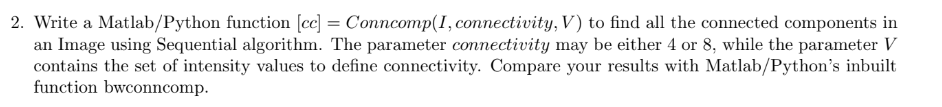

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np



def four_con_comp(img,v):
    r=len(img)
    c=len(img[0])
    leble=[[0 for i in range(c)] for j in range(r)]
    cur_leb=1
    store={}
    for i in range(0,r):
        for j in range(0,c):
            if img[i][j] not in v:   #if current pixel not in V then move forward
                continue
            elif img[i][j] in v:
                x1=0    #take x1 and x2 two neighbour pixel in roster order scan
                x2=0
                if i-1>=0:
                    x1=leble[i-1][j]
                if j-1>=0:
                    x2=leble[i][j-1]
                # check condition 
                if x1==0 and x2==0:   #if both pixel 0 then assign new leble and increment leble by one
                    leble[i][j]=cur_leb
                    cur_leb+=1
                elif x1!=0 and x2!=0:   # if both pixel are not 0 and both are not equall then assign  minimum of them and store max=min
                    if x1!=x2:
                        t1=min(x1,x2)
                        t2=max(x1,x2)
                        leble[i][j]=t1
                        store[t2]=t1
                    else:                 # if both are equall then assign any leble  of them to current pixel
                        leble[i][j]=x1

                elif x1==0 and x2!=0:     #if one pixel x1 or x2 is zero then then assign non zero leble to the current pixel
                    leble[i][j]=x2
                elif x2 ==0 and x1!=0:
                    leble[i][j]=x1 
                
                
    # print("leble matrix after first phase:\n")
    # for it in leble:
    #     print(it)
    max_lable=0
    for i in range(0,r):
        for j in range(0,c):
            max_lable=max(max_lable,leble[i][j])
            if leble[i][j] in store.keys():
                leble[i][j]=store[leble[i][j]]

    # print("leble matrix after second phase :\n")
    # for it in leble:
    #     print(it)
    return max_lable-len(store)




def eight_con_comp(img,v):
    r=len(img)
    c=len(img[0])
    leble=[[0 for i in range(c)] for j in range(r)]  #initialize leble matrix with 0
    cur_leb=1
    store={}   # it will store  conflicting pixel
    for i in range(0,r):
        for j in range(0,c):
            if img[i][j] not in v:
                continue
            else:
                nbar=[0,0,0,0]         #take 4-neighbour pixel
                if i-1>=0 and j+1<c:   
                    nbar[0]=leble[i-1][j+1]
                if i-1>=0:
                    nbar[1]=leble[i-1][j]
                if i-1>=0 and j-1 >=0:
                    nbar[2]=leble[i-1][j-1]
                if j-1>=0:
                    nbar[3]=leble[i][j-1]
                # check condition 
                if nbar[0]==0 and nbar[1]==0 and nbar[2]==0 and nbar[3]==0:
                    leble[i][j]=cur_leb
                    cur_leb+=1
                else:
                    mn=1000000
                    for x in nbar:
                        if x!=0:
                            mn=min(mn,x)
                    leble[i][j]=mn
                    for x in nbar:
                        if x!=0 and x!=mn:
                            store[x]=mn

                
    # print("leble matrix after first phase:\n")
    # for it in leble:
    #     print(it)
    max_lable=0
    for i in range(0,r):
        for j in range(0,c):
            max_lable=max(max_lable,leble[i][j])
            if leble[i][j] in store.keys():
                leble[i][j]=store[leble[i][j]]

    # print("leble matrix after second phase :\n")
    # for it in leble:
    #     print(it)
    return max_lable-len(store)

def Concomp(img,connectvity,v):
    if connectvity==4:
        return four_con_comp(img,v)
    return eight_con_comp(img,v)

#***************give either an .png image  or input matrix *******************
# img=mpimg.imread('img.png')
# mat=img[:,:0]  #convert image to matrix and then use this to input of Concomp() function

mat=[
    [0,0,1,2,3,0,5],
    [6,0,7,3,2,7,3],
    [5,4,3,4,3,5,2],
    [2,3,1,6,2,7,3]
]
# *************** give v array **************
v=[2,3]

# ******************call function to find number of connected component  **********************
print(Concomp(mat,4,v))



4
